##Apartado 1: Carga y explora el dataset CIFAR10

Importa la librerías Numpy

In [1]:
import numpy as np

Importa los módulos necesarios para construir una red neuronal profunda: Sequential, Dense y Flatten

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow import keras

##Apartado 2: Importa el dataset CIFAR10 de Keras, en un conjunto de datos de entrenamiento y un conjunto de datos para test.

In [3]:
from keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


##Apartado 3: Explora los datos.

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
len(y_train)

50000

In [8]:
len(x_train)

50000

In [9]:
y_train[1]

array([9], dtype=uint8)

Representación visual de etiquetas e imágenes

In [10]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
import matplotlib.pyplot as plt

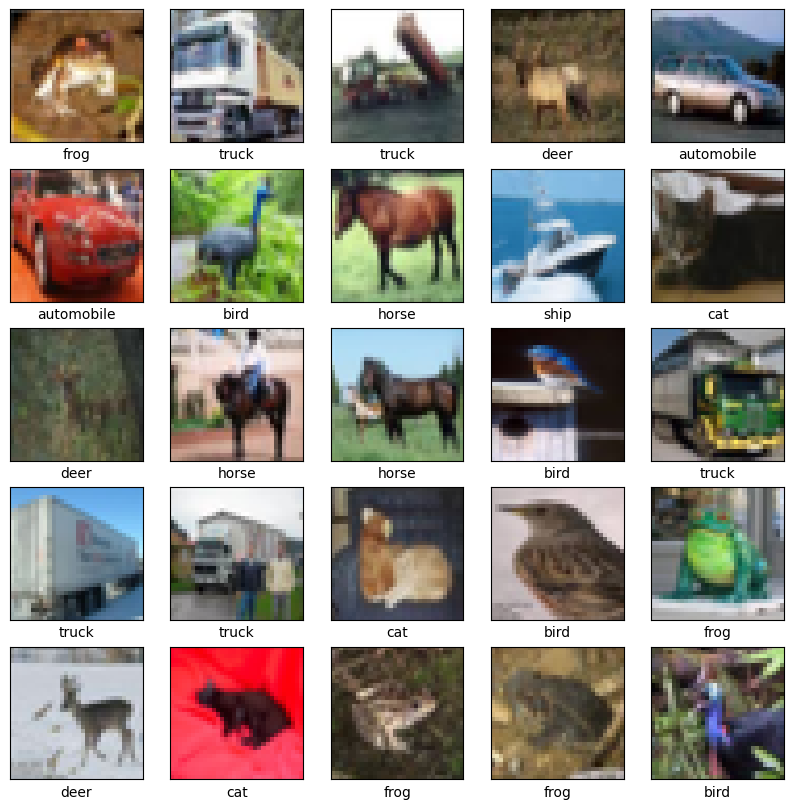

In [12]:
plt.figure(figsize=[10,10])
for i in range (25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i][0]])

Normalización de imágenes de entrenamiento y test

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.0
x_test = x_test/255.0

Normalización y one hot encoding de las etiqueta de entrenamiento y test

In [14]:
from keras.utils import to_categorical

In [15]:
# Utilizamos 10 classes puesto que hay 10 etiquetas en el dataset

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [16]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

##Apartado 4: Crea el modelo.

Modelo básico con 32 neuronas

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

##Apartado 5: Entrena el modelo.

Compilación y entrenamiendo del modelo básico

In [18]:
model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9676 - accuracy: 0.2720
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8680 - accuracy: 0.3168
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8520 - accuracy: 0.3269
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8376 - accuracy: 0.3308
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8285 - accuracy: 0.3360
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8227 - accuracy: 0.3376
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8200 - accuracy: 0.3360
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8138 - accuracy: 0.3410
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8100 - accuracy: 0.3458
Epoch 10/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.809

##Apartado 6: Mejora el modelo.

Modelo con disposición ascendente de neuronas (32-512)

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [21]:
model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(x_train,y_train,epochs=25)

Epoch 1/25
1563/1563 [==============================] - 16s 8ms/step - loss: 1.9443 - accuracy: 0.2778
Epoch 2/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8486 - accuracy: 0.3265
Epoch 3/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8126 - accuracy: 0.3414
Epoch 4/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7939 - accuracy: 0.3479
Epoch 5/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7737 - accuracy: 0.3555
Epoch 6/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7545 - accuracy: 0.3613
Epoch 7/25
1563/1563 [==============================] - 10s 7ms/step - loss: 1.7380 - accuracy: 0.3676
Epoch 8/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7252 - accuracy: 0.3742
Epoch 9/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7101 - accuracy: 0.3779
Epoch 10/25
1563/1563 [==============================] - 10s 7ms/step - l

Modelo con disposición descendente de neuronas (512-32)

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [35]:
model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(x_train,y_train,epochs=25)

Epoch 1/25
1563/1563 [==============================] - 39s 24ms/step - loss: 1.9387 - accuracy: 0.2867
Epoch 2/25
1563/1563 [==============================] - 36s 23ms/step - loss: 1.7406 - accuracy: 0.3709
Epoch 3/25
1563/1563 [==============================] - 36s 23ms/step - loss: 1.6419 - accuracy: 0.4111
Epoch 4/25
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5849 - accuracy: 0.4315
Epoch 5/25
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5396 - accuracy: 0.4496
Epoch 6/25
1563/1563 [==============================] - 35s 22ms/step - loss: 1.5052 - accuracy: 0.4598
Epoch 7/25
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4797 - accuracy: 0.4692
Epoch 8/25
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4495 - accuracy: 0.4827
Epoch 9/25
1563/1563 [==============================] - 35s 23ms/step - loss: 1.4260 - accuracy: 0.4882
Epoch 10/25
1563/1563 [==============================] - 38s 24m

Modelo con learning rate modificado

In [37]:
model_lr = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [38]:
from tensorflow.keras.optimizers import Adam

custom_optimizer = Adam(learning_rate=0.0001)

model_lr.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model_lr.fit(x_train,y_train,epochs=25)

Epoch 1/25
1563/1563 [==============================] - 37s 23ms/step - loss: 1.9006 - accuracy: 0.3128
Epoch 2/25
1563/1563 [==============================] - 35s 23ms/step - loss: 1.7006 - accuracy: 0.3934
Epoch 3/25
1563/1563 [==============================] - 35s 22ms/step - loss: 1.6135 - accuracy: 0.4243
Epoch 4/25
1563/1563 [==============================] - 35s 22ms/step - loss: 1.5470 - accuracy: 0.4481
Epoch 5/25
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4944 - accuracy: 0.4695
Epoch 6/25
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4579 - accuracy: 0.4848
Epoch 7/25
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4177 - accuracy: 0.4952
Epoch 8/25
1563/1563 [==============================] - 35s 23ms/step - loss: 1.3858 - accuracy: 0.5063
Epoch 9/25
1563/1563 [==============================] - 35s 22ms/step - loss: 1.3605 - accuracy: 0.5188
Epoch 10/25
1563/1563 [==============================] - 36s 23m

## Apartado 7: Evalúa el nuevo modelo.

Evaluación del modelo con disposición descendente de neuronas (512-32)

In [40]:
test_acc = model.evaluate(x_test,y_test)

print ('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 1.4883 - accuracy: 0.4972
Test accuracy: [1.4882746934890747, 0.49720001220703125]


Evaluación del modelo con learning rate modificado

In [41]:
test_acc_lr = model_lr.evaluate(x_test,y_test)

print ('Test accuracy:', test_acc_lr)

313/313 [==============================] - 2s 6ms/step - loss: 1.3307 - accuracy: 0.5441
Test accuracy: [1.330711841583252, 0.5440999865531921]


##Apartado 8: Visualiza las predicciones.

Visualización del modelo con learning rate modificado

313/313 [==============================] - 2s 7ms/step


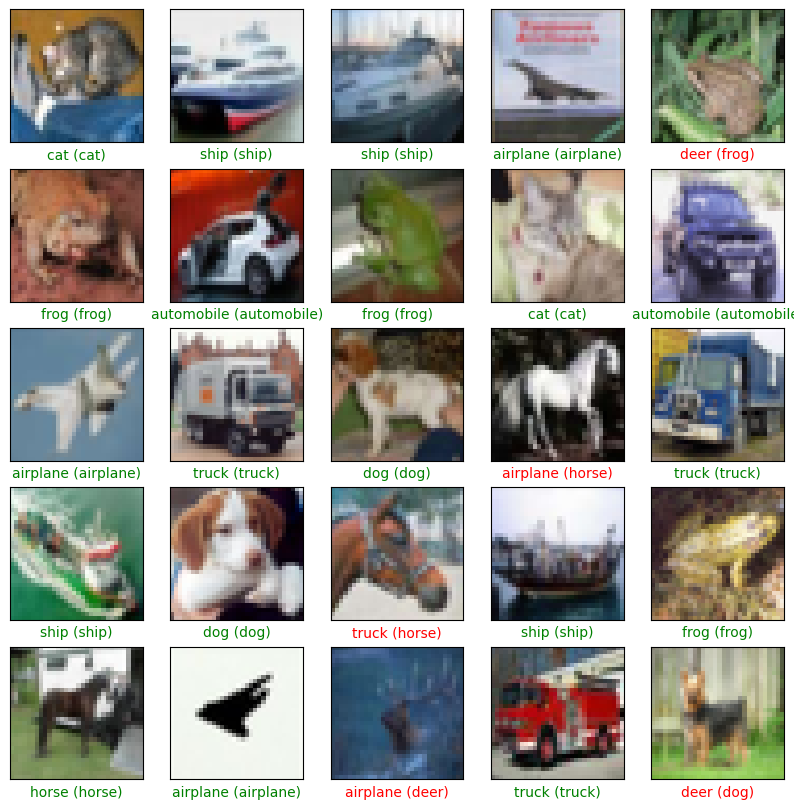

In [44]:
predictions = model_lr.predict(x_test)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i]
    true_label = y_test[i]
    if predicted_label.argmax() == true_label.tolist().index(1.):
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label.argmax()],
                                  class_names[true_label.tolist().index(1.)]),
                                  color=color)